# پروژه شاپرک

 این نوتبوک که دارای سه بخش اصلی است. ابتدا در بخش اول به حل مسئله پیشبینی میزان تراکنش بانکی در سال 2021 برای کشورهای مختلف پرداخته ایم. در بخش دوم نیز به حل مسئله طبقه بندی داده‌های با 36 ویژگی مختلف پرداخته شده است در بخش سوم نیز کوئری های خواسته شده قرار داده شده است. 

## بخش اول

در این بخش ابتدا به توصیف داده‌ها و بصری سازی داده‌ها میپردازیم و سپس داده‌های پرت را از مجموعه داده شناسایی و حذف کرده، سپس به پیشبینی میزان تراکنش کشورها در سال 2021 مبتنی بر تراکنش سالهای قبل پرداخته شده است

In [71]:
# Reading the data

import pandas as pd
df = pd.read_csv('./Prediction_Task.csv')
df.head()

,Code,AB_CITY,CITY,MEASURE,INSTRUMENT_TYPE,TERMINAL_LOCATION,CARD_LOCATION,TERMINAL_TYPE,AVAILABILITY,2012,...,2016,STATUS5,2017,STATUS6,2018,STATUS7,2019,STATUS8,2020,STATUS9
0,A:AR:N:A:A:Z:Z:A:A:A:F:A,AR,Argentina,Number,A,Not applicable,Not applicable,At POS,All users,21.338,...,120.867,A,158.232,A,223.519,A,326.677,A,885.219,A
1,A:AR:N:A:A:Z:Z:A:A:Z:A:A,AR,Argentina,Number,A,Not applicable,Not applicable,All,All users,1127.108,...,1797.984,A,1977.306,A,2254.098,A,2734.840,A,3290.771,A
2,A:AR:N:B:A:Z:Z:A:A:A:F:A,AR,Argentina,Number,B,Not applicable,Not applicable,All,All users,21.338,...,120.867,A,158.230,A,223.513,A,326.314,A,884.800,A
3,A:AR:N:C:A:Z:Z:A:A:Z:A:A,AR,Argentina,Number,C,Not applicable,Not applicable,At ATMs,All users,35.729,...,52.718,A,64.590,A,79.889,A,93.838,A,107.514,A
4,A:AR:N:C:D:Z:Z:A:A:Z:A:A,AR,Argentina,Number,C,Not applicable,Not applicable,At POS,All users,35.729,...,52.718,A,64.590,A,79.889,A,93.838,A,107.514,A


In [72]:
# A short statistical description of transaction counts in different years.

df.describe()

,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.200000e+02,5.760000e+02,6.680000e+02,6.770000e+02,6.830000e+02,6.950000e+02,7.020000e+02,7.100000e+02,7.250000e+02
mean,8.583246e+07,1.058123e+08,9.651666e+07,1.074137e+08,1.153668e+08,1.192174e+08,1.336787e+08,1.475587e+08,1.546582e+08
std,8.292926e+08,1.034742e+09,1.009260e+09,1.129704e+09,1.232756e+09,1.306385e+09,1.529890e+09,1.710551e+09,1.834205e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.541810e+02,4.871208e+02,3.754998e+02,3.579300e+02,4.023000e+02,3.937410e+02,4.465445e+02,5.230000e+02,4.022780e+02
50%,5.310900e+03,5.368547e+03,4.013782e+03,4.833688e+03,5.191600e+03,4.817900e+03,5.822110e+03,6.442132e+03,5.916021e+03
75%,3.514740e+05,3.806831e+05,2.478243e+05,2.636808e+05,2.468899e+05,2.439234e+05,2.586201e+05,3.010492e+05,3.062433e+05
max,1.209008e+10,1.544648e+10,1.529161e+10,1.662816e+10,2.012770e+10,2.288287e+10,2.913104e+10,3.453512e+10,3.487364e+10


با توجه به اینکه ویژگی های زیر تکراری یا فاقد اطلاعات مفید هستند، آنها را حذف میکنیم.
* Code
* AB_CITY
* AVAILABILITY

In [73]:
df = df.drop(['Code','AVAILABILITY','AB_CITY'], axis=1)

###  به منظور شناخت و درکت بهتر از داده‌ها، در سلولهای زیر به بررسی تعدادی از سوالات در مورد داده‌ها میپردازیم

* بیشترین مقدار تراکنش در هر سال متعلق به کدام کشور است؟

In [74]:
grouped_df_2012 = df.groupby('CITY')[['2012','2013','2014','2015','2016','2017','2018','2019','2020']].sum()
total_sum = grouped_df_2012
city_with_max_sum = total_sum.idxmax()
df_max = pd.concat([total_sum.max(), city_with_max_sum], axis=1)
df_max.columns = ['Maximum value', 'Country']
print(df_max)

      Maximum value    Country
2012   3.179006e+10      Korea
2013   3.235026e+10      Korea
2014   3.451294e+10      Korea
2015   3.870104e+10      Korea
2016   3.968727e+10      Korea
2017   4.026013e+10      Korea
2018   4.353536e+10      Korea
2019   5.095003e+10  Indonesia
2020   5.327429e+10      Korea


* بیشترین مقدار تراکنش هر کشور متعلق به کدام سال است؟

In [75]:
grouped_df_2012 = df.groupby('CITY')['2012'].sum()
grouped_df_2013 = df.groupby('CITY')['2013'].sum()
grouped_df_2014 = df.groupby('CITY')['2014'].sum()
grouped_df_2015 = df.groupby('CITY')['2015'].sum()
grouped_df_2016 = df.groupby('CITY')['2016'].sum()
grouped_df_2017 = df.groupby('CITY')['2017'].sum()
grouped_df_2018 = df.groupby('CITY')['2018'].sum()
grouped_df_2019 = df.groupby('CITY')['2019'].sum()
grouped_df_2020 = df.groupby('CITY')['2020'].sum()

result = pd.concat([grouped_df_2012, grouped_df_2013, grouped_df_2014, grouped_df_2015, grouped_df_2016, grouped_df_2017, grouped_df_2018, grouped_df_2019, grouped_df_2020], axis=1)
result.columns = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
grouped_max = result.max(axis=1)
column_with_max = result.idxmax(axis=1)
df_max = pd.concat([grouped_max, column_with_max], axis=1)
df_max.columns = ['Maximum value', 'Year']
print(df_max)


                Maximum value  Year
CITY                               
Argentina        1.848089e+08  2020
Australia        9.934046e+06  2017
Belgium          9.280273e+06  2019
Brazil           2.082762e+07  2017
Canada           1.476479e+07  2019
China            4.933133e+09  2020
France           3.715364e+06  2015
Germany          7.748842e+07  2012
Hong Kong SAR    3.398595e+05  2019
India            3.829077e+08  2019
Indonesia        5.095003e+10  2019
Italy            1.143608e+07  2018
Japan            1.964492e+09  2019
Korea            5.327429e+10  2020
Mexico           7.296239e+08  2020
Netherlands      2.643718e+06  2020
Saudi Arabia     1.366519e+08  2012
Singapore        1.476831e+06  2019
South Africa     7.549385e+07  2020
Spain            3.475938e+07  2014
Sweden           4.241012e+06  2019
Switzerland      5.581986e+06  2020
Turkey           1.188106e+07  2020
United Kingdom   2.023961e+08  2020
United States    2.290539e+08  2020


*  میزان تراکنشهای هر کشور از طریق هر نوع دستگاه چقدر بوده است؟

In [76]:
grouped_df_2012 = df.groupby(['CITY','TERMINAL_TYPE'])['2012'].sum()
grouped_df_2013 = df.groupby(['CITY','TERMINAL_TYPE'])['2013'].sum()
grouped_df_2014 = df.groupby(['CITY','TERMINAL_TYPE'])['2014'].sum()
grouped_df_2015 = df.groupby(['CITY','TERMINAL_TYPE'])['2015'].sum()
grouped_df_2016 = df.groupby(['CITY','TERMINAL_TYPE'])['2016'].sum()
grouped_df_2017 = df.groupby(['CITY','TERMINAL_TYPE'])['2017'].sum()
grouped_df_2018 = df.groupby(['CITY','TERMINAL_TYPE'])['2018'].sum()
grouped_df_2019 = df.groupby(['CITY','TERMINAL_TYPE'])['2019'].sum()
grouped_df_2020 = df.groupby(['CITY','TERMINAL_TYPE'])['2020'].sum()



# Concatenate the grouped sums into a DataFrame
result = pd.concat([grouped_df_2012, grouped_df_2013, grouped_df_2014, grouped_df_2015, grouped_df_2016, grouped_df_2017, grouped_df_2018, grouped_df_2019, grouped_df_2020], axis=1)
result.columns = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
grouped_max = result.max(axis=1)
column_with_max = result.idxmax(axis=1)
df_max = pd.concat([grouped_max, column_with_max], axis=1)
df_max.columns = ['Maximum value', 'Year']
print(df_max)

total_sum = grouped_df_2012 + grouped_df_2013 + grouped_df_2014 + grouped_df_2015 + grouped_df_2016 + grouped_df_2017 + grouped_df_2018 + grouped_df_2019 + grouped_df_2020
max_value = total_sum.max()
print("Maximum value:", max_value)
city_with_max_sum = total_sum.idxmax()
print("Terminal Type with the maximum transaction:", city_with_max_sum[1])

                              Maximum value  Year
CITY           TERMINAL_TYPE                     
Argentina      All             1.694083e+08  2020
               At ATMs         1.482494e+07  2020
               At POS          5.756445e+05  2020
Australia      All             9.169556e+06  2017
               At ATMs         6.685391e+05  2015
...                                     ...   ...
United Kingdom All             2.023550e+08  2020
               At ATMs         4.219400e+04  2019
United States  All             1.881870e+08  2020
               At ATMs         4.073842e+07  2020
               At POS          1.284749e+05  2020

[69 rows x 2 columns]
Maximum value: 358795510831.79193
Terminal Type with the maximum transaction: All


* رابطه ی بین دو ستون TERMINAL_LOCATION و TERMINAL_TYPE

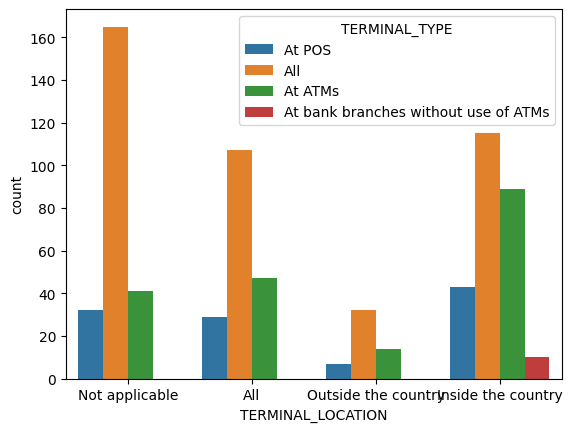

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TERMINAL_LOCATION', hue='TERMINAL_TYPE', data=df)
plt.show()

همانطور که مشخص است حالت استفاده از شعب بانک بدون استفاده از دستگاه خودپرداز تنها در داخل کشور رخ داده است. همچنین مشخص است که حالت آل در همه مکانها بیشترین فرکانس را داشته است. و همواره استفاده از دستگاه خودپرداز در جایگاه دوم بوده است.

در نمودار زیر رابطه بین مکان دستگاه و محل صدور کارت مورد بررسی قرار گرفته است. همانطور که مشخص است در بیشتر موارد (238 مورد) اطلاعات دقیقی از محل کارت و دستگاه وجود نداشته است. این میتواند بدان معنی باشد که ویژگی های ویژگی های محل کارت و محل دستگاه پرداخت حاوی اطلاعات زیادی نیست.

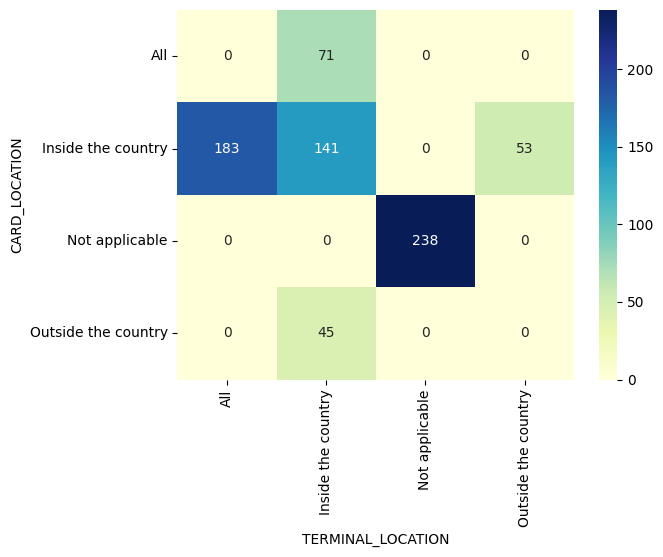

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with categorical feature columns 'Feature1' and 'Feature2'
cross_tab = pd.crosstab(df['CARD_LOCATION'], df['TERMINAL_LOCATION'])
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

نمودار زیر نیز نسبت انواع دستگاه‌های پرداخت را در کل مجموعه داده نمایش میدهد.

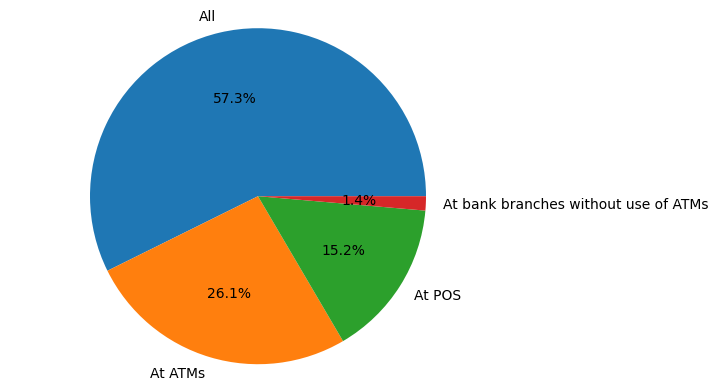

In [79]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a categorical column 'Category'
category_counts = df['TERMINAL_TYPE'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

نمودارهای زیر پلات جعبه‌ای (باکس پلات) برای انواع ترمینالهای پرداخت در سالهای مختلف را نشان میدهد

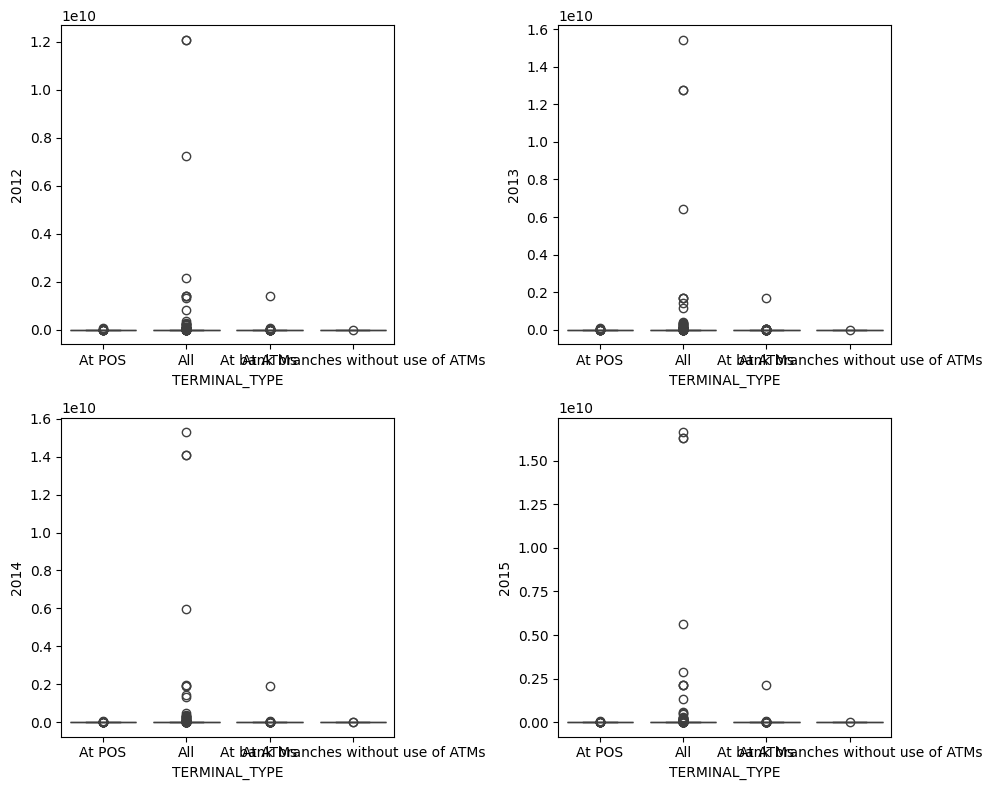

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a categorical column 'Category' and a numerical column 'Value'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Boxplot
sns.boxplot(x='TERMINAL_TYPE', y='2012', data=df, ax=axes[0, 0])

# Plot 2: Bar plot
sns.boxplot(x='TERMINAL_TYPE', y='2013', data=df, ax=axes[0, 1])

# Plot 3: Point plot
sns.boxplot(x='TERMINAL_TYPE', y='2014', data=df, ax=axes[1, 0])

# Plot 4: Violin plot
sns.boxplot(x='TERMINAL_TYPE', y='2015', data=df, ax=axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

----

با توجه به نتیجه بدست آمده از باکس پلات به وضوح میتوان دید که داده‌های پرت بسیار از توزیع اصلی داده‌ها دور هستند. پس نیاز است تا داده‌های پرت را حذف کنیم.

پیش از این کار ابتدا میزان تراکنشها درسالهای مختلف را به صورت دو به دو پلات میکنیم.

---

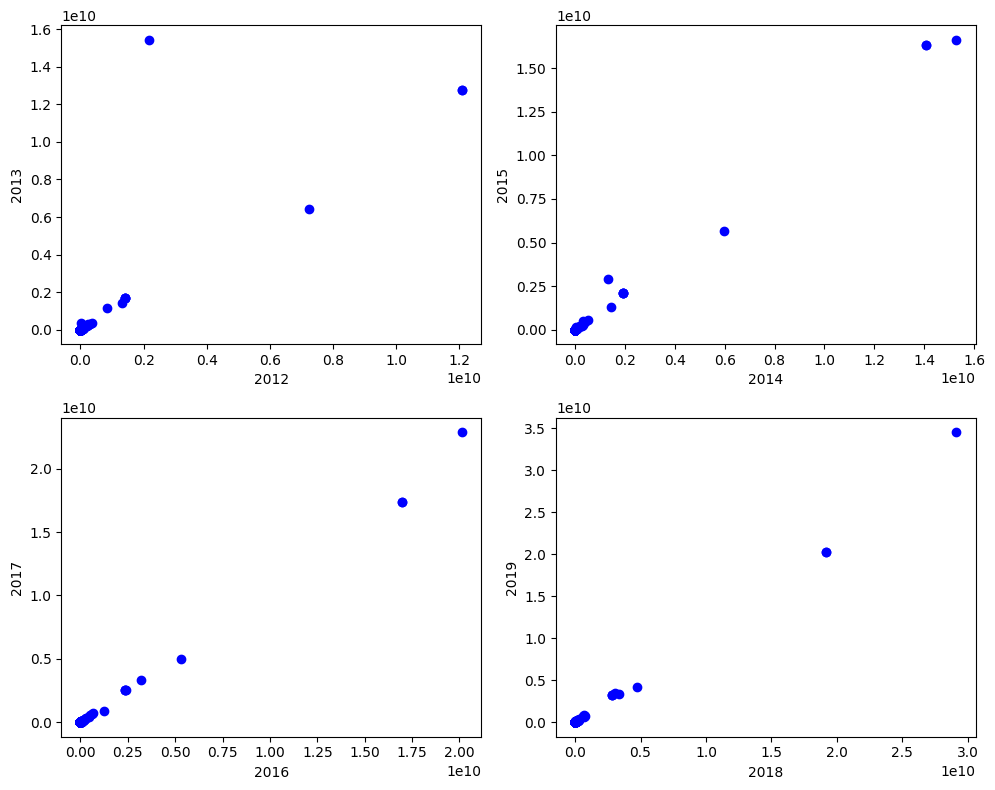

In [81]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical columns '2017' and '2016'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Scatter plot
axes[0, 0].plot(df['2012'], df['2013'], 'bo')
axes[0, 0].set_xlabel('2012')
axes[0, 0].set_ylabel('2013')

# Plot 2: Histogram
axes[0, 1].plot(df['2014'], df['2015'], 'bo')
axes[0, 1].set_xlabel('2014')
axes[0, 1].set_ylabel('2015')

# Plot 3: Line plot
axes[1, 0].plot(df['2016'], df['2017'], 'bo')
axes[1, 0].set_xlabel('2016')
axes[1, 0].set_ylabel('2017')

# Plot 4: Box plot
axes[1, 1].plot(df['2018'], df['2019'], 'bo')
axes[1, 1].set_xlabel('2018')
axes[1, 1].set_ylabel('2019')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

همانطور که واضح است رابطه بین میزان تراکنشها در سالهای متوالی نسبت به هم رابطه خطی دارند. همچنین مقادیر پرت نسبت به توزیع اصلی داده‌ها بسیار دور هستند.

 دقت کنید که چون توزیع داده ها نرمال نیست و چولگی زیادی به سمت صفر دارد حذف داده‌های پرت خارج از سه یا دو واریانس از میانگین خیلی عملیاتی نیست. این امر در پلات زیر نیز به وضوح قابل مشاهده است.


---

<Axes: ylabel='2012'>

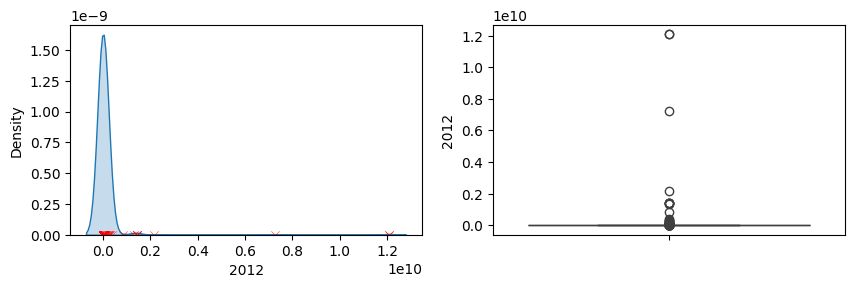

In [82]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.kdeplot(data=df['2012'], fill=True)#sns.distplot(df['2012'])
sns.scatterplot(data=df, x='2012', y=[0] * len(df), color='red', marker='x', alpha=0.7)
plt.subplot(2,2,2)
sns.boxplot(df['2012'])


با توجه به فاصله بسیار زیاد داده‌های پرت اقدام به حذف آن‌ها میکنیم. بدین منظور مقادیر بالاتر از 50,000 را حذف میکنیم. این مقدار داده‌های بسیار پرت را حذف میکند اما همچنان شکل کلی توزیع داده‌ها را نیز حفظ میکند. 

In [83]:
df = df[df['2012']<0.5e5]
df = df[df['2013']<0.5e5]
df = df[df['2014']<0.5e5]
df = df[df['2015']<0.5e5]
df = df[df['2016']<0.5e5]
df = df[df['2017']<0.5e5]
df = df[df['2018']<0.5e5]
df = df[df['2019']<0.5e5]
df = df[df['2020']<0.5e5]

حال مجددا توزیع تراکنشها در سالهای متوالی را پس از حذف داده‌های پرت  نمایش میدهیم

<Axes: ylabel='2012'>

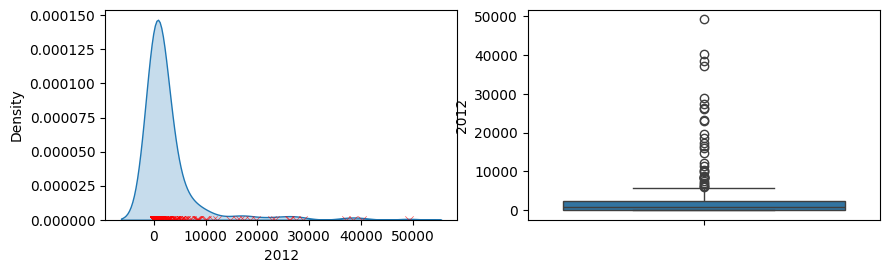

In [84]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.kdeplot(data=df['2012'], fill=True)#sns.distplot(df['2012'])
sns.scatterplot(data=df, x='2012', y=[0] * len(df), color='red', marker='x', alpha=0.7)
plt.subplot(2,2,2)
sns.boxplot(df['2012'])

---

در شکل زیر و پس از حذف داده‌های پرت؛ رابطه خطی مابین مقادیر تراکنش در سالهای متولی به خوبی قابل مشاهده است. در ادامه باکس پلات قبلی برای ترمینال تایپ در سالهای مختلف را پس از حذف داده‌های پرت ترسیم می‌کنیم.


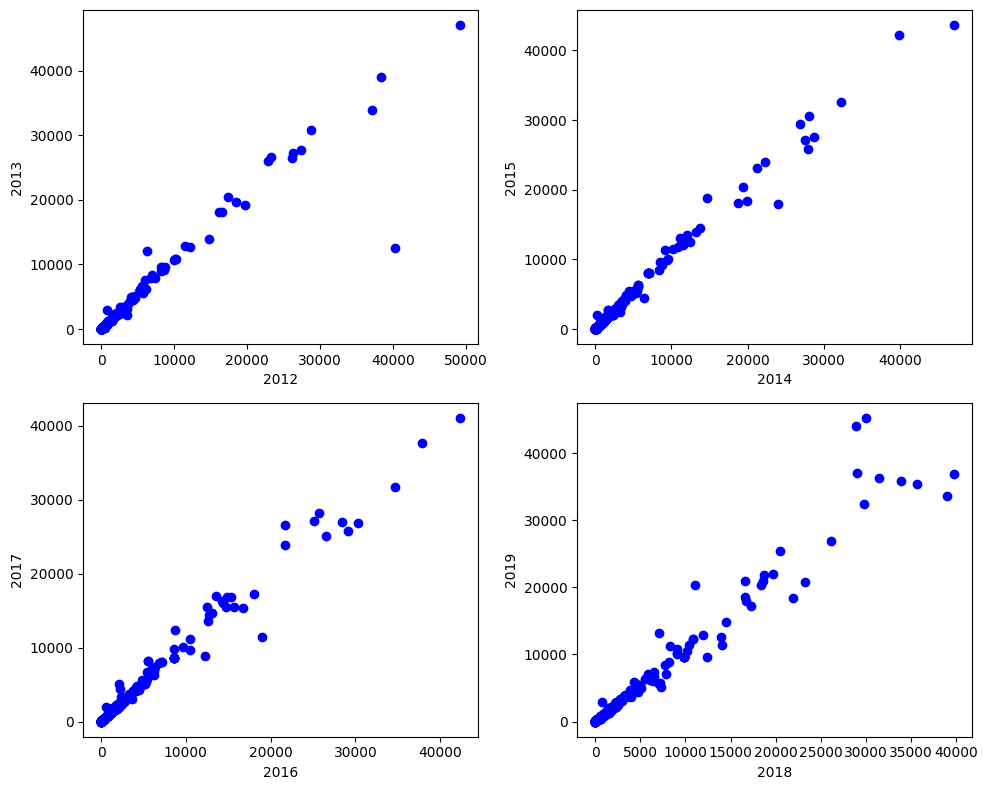

In [85]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical columns '2017' and '2016'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Scatter plot
axes[0, 0].plot(df['2012'], df['2013'], 'bo')
axes[0, 0].set_xlabel('2012')
axes[0, 0].set_ylabel('2013')

# Plot 2: Histogram
axes[0, 1].plot(df['2014'], df['2015'], 'bo')
axes[0, 1].set_xlabel('2014')
axes[0, 1].set_ylabel('2015')

# Plot 3: Line plot
axes[1, 0].plot(df['2016'], df['2017'], 'bo')
axes[1, 0].set_xlabel('2016')
axes[1, 0].set_ylabel('2017')

# Plot 4: Box plot
axes[1, 1].plot(df['2018'], df['2019'], 'bo')
axes[1, 1].set_xlabel('2018')
axes[1, 1].set_ylabel('2019')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

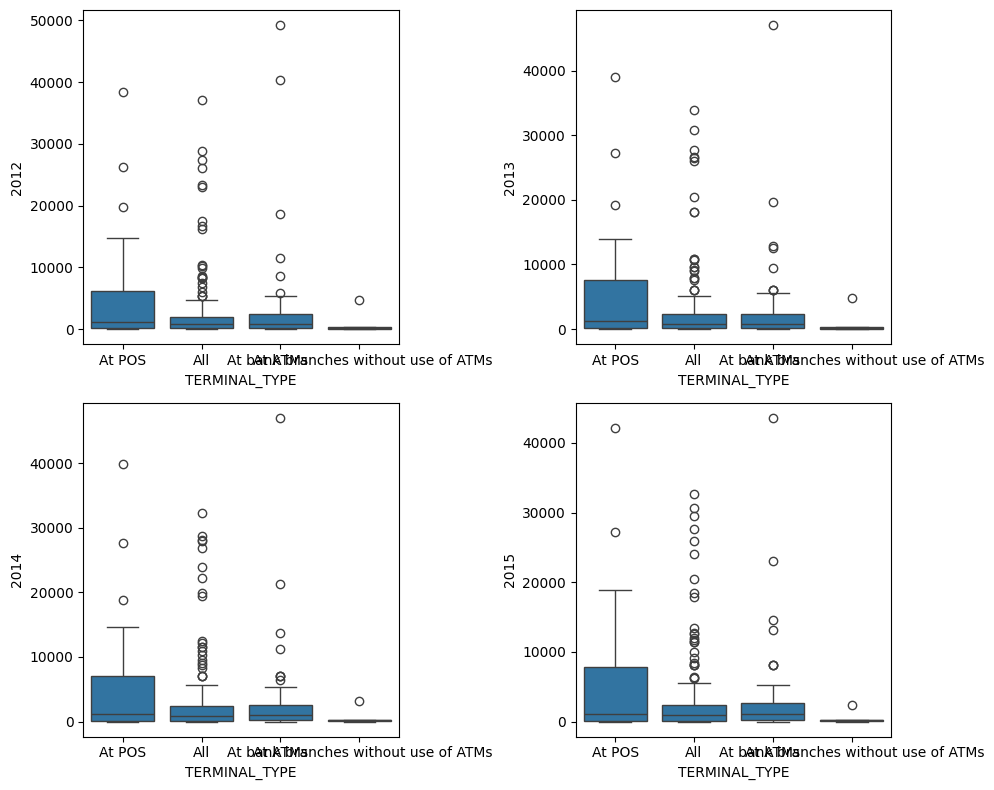

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a categorical column 'Category' and a numerical column 'Value'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Boxplot
sns.boxplot(x='TERMINAL_TYPE', y='2012', data=df, ax=axes[0, 0])

# Plot 2: Bar plot
sns.boxplot(x='TERMINAL_TYPE', y='2013', data=df, ax=axes[0, 1])

# Plot 3: Point plot
sns.boxplot(x='TERMINAL_TYPE', y='2014', data=df, ax=axes[1, 0])

# Plot 4: Violin plot
sns.boxplot(x='TERMINAL_TYPE', y='2015', data=df, ax=axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

همانطور که دیده می شود داده‌های پرت به شکل خوبی حذف شده‌اند. هرچند میتوان محدوده حذف داده‌های پرت را افزایش داد اما مقدار انتخاب شده نسبت خوبی از داده‌ها را برای تحلیلهای آتی نگه خواهد داشت.

---

یک راه دیگر برای حذف داده‌های پرت استفاده از الگوریتم های خوشه بندی است. داده‌هایی که در خوشه‌ها قرار نمیگیرند به عنوان داده پرت در نظر گرفته شده و از مجموعه داده حذف می شوند. در تحلیل زیر با استفاده از الگوریتم خوشه بندی مبتنی بر چگالی داده‌ها، نمونه‌های پرت در سال 2012 شناسایی شده‌اند.

In [87]:
df = pd.read_csv('./Prediction_Task.csv')

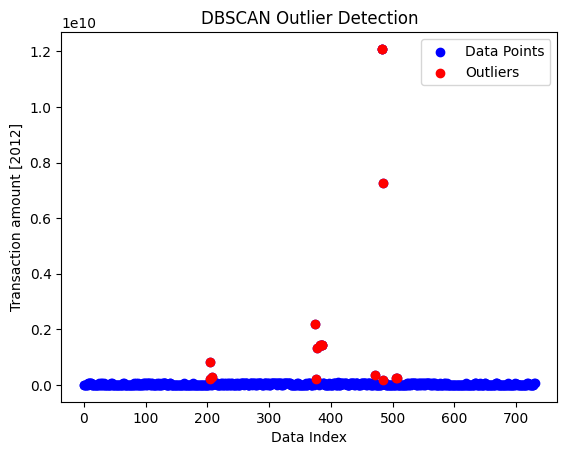

In [88]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd


data = df['2012']
# data_without_missing = data.dropna()

data_imputed = data.fillna(data.mean())  # or data.median()

X = data_imputed.to_numpy().reshape(-1, 1)
epsilon = 50000000
min_samples = 10   
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X)

outliers_mask = data_imputed.isna() | (dbscan.labels_ == -1)
outliers = data_imputed[outliers_mask]
outlier_indices = outliers_mask[outliers_mask].index.tolist()

data_indices = range(len(data_imputed))

plt.scatter(data_indices, data_imputed, c='blue', label='Data Points')
plt.scatter(outlier_indices, outliers, c='red', label='Outliers')

plt.xlabel('Data Index')
plt.ylabel('Transaction amount [2012]')
plt.title('DBSCAN Outlier Detection')
plt.legend()
plt.show()

# تخمین میزان تراکنش برای سال 2021

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import joblib

ابتدا متغیرهای کتگوریکال را با استفاده از وان‌هات انکدینگ به صورت برداری تبدیل میکنیم

In [90]:
df = pd.read_csv('./Prediction_Task.csv')

df = df.drop(['Code','AVAILABILITY','AB_CITY'], axis=1)

categorical_cols =['CITY','MEASURE','INSTRUMENT_TYPE',
                                            'TERMINAL_LOCATION','CARD_LOCATION','TERMINAL_TYPE',
                                            'STATUS','STATUS2','STATUS3','STATUS4','STATUS5','STATUS6','STATUS7','STATUS8','STATUS9']
for col in categorical_cols:
    one_hot_encoded = pd.get_dummies(df[col]).astype(int)
    df = pd.concat([df.drop(col, axis=1), one_hot_encoded], axis=1)


In [91]:
df.head(100)

,2012,2013,2014,2015,2016,2017,2018,2019,2020,Argentina,...,L,M,A,L,M,A,L,M,A,M
0,21.338,68.452,81.704,98.951,120.867,158.232,223.519,326.677,885.219,1,...,0,0,1,0,0,1,0,0,1,0
1,1127.108,1230.436,1384.956,1547.812,1797.984,1977.306,2254.098,2734.840,3290.771,1,...,0,0,1,0,0,1,0,0,1,0
2,21.338,68.452,81.704,98.951,120.867,158.230,223.513,326.314,884.800,1,...,0,0,1,0,0,1,0,0,1,0
3,35.729,38.887,42.768,46.792,52.718,64.590,79.889,93.838,107.514,1,...,0,0,1,0,0,1,0,0,1,0
4,35.729,38.887,42.768,46.792,52.718,64.590,79.889,93.838,107.514,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,341.651,317.460,312.780,303.553,289.371,282.701,177.850,0,...,0,0,1,0,0,1,0,0,1,0
96,411.260,420.250,319.910,301.210,294.030,284.915,270.270,233.870,165.660,0,...,0,0,1,0,0,1,0,0,1,0
97,411.260,420.250,317.560,296.370,289.910,281.270,267.220,231.140,163.870,0,...,0,0,1,0,0,1,0,0,1,0
98,NaN,NaN,2.350,4.840,4.120,3.645,3.050,2.730,1.790,0,...,0,0,1,0,0,1,0,0,1,0


In [92]:
df = df.dropna()

In [93]:
# Outlier removal
df = df[df['2012']<0.5e5]
df = df[df['2013']<0.5e5]
df = df[df['2014']<0.5e5]
df = df[df['2015']<0.5e5]
df = df[df['2016']<0.5e5]
df = df[df['2017']<0.5e5]
df = df[df['2018']<0.5e5]
df = df[df['2019']<0.5e5]
df = df[df['2020']<0.5e5]

با توجه به اینکه مقادیر مربوط به تراکنشها محدوده اعداد بسیار بزرگی را شامل میشود. در این مرحله ستونهای تراکنش در سالهای مختلف را بین صفر و یک نرمال میکنیم.

In [94]:
#normalize transaction columns to range [0,1]

from sklearn.preprocessing import MinMaxScaler
price_columns = ['2012', '2013','2014','2015','2016','2017','2018','2019','2020']
scaler = MinMaxScaler()
df[price_columns] = scaler.fit_transform(df[price_columns])

با توجه به اینکه هدف نهایی پیش بینی مقدادیر تراکنش برای سال 2021 است که در مجموعه داده ما موجود نمی باشد. مجموعه داده را به صورت پیشبینی مقدار تراکنش سال بعد مبتنی بر تراکنش سال جاری و سایر ویژگیها تبدیل میکنیم

In [95]:
transformed_df = df.iloc[:, 9:] #onehot columns


new_df1 = pd.concat([transformed_df, df[['2012','2013']]], axis=1)
new_df1 = new_df1.rename(columns={'2012': 'this year', '2013': 'next year'})

new_df2 = pd.concat([transformed_df, df[['2013','2014']]], axis=1)
new_df2 = new_df2.rename(columns={'2013': 'this year', '2014': 'next year'})

new_df3 = pd.concat([transformed_df, df[['2014','2015']]], axis=1)
new_df3 = new_df3.rename(columns={'2014': 'this year', '2015': 'next year'})

new_df4 = pd.concat([transformed_df, df[['2015','2016']]], axis=1)
new_df4 = new_df4.rename(columns={'2015': 'this year', '2016': 'next year'})

new_df5 = pd.concat([transformed_df, df[['2016','2017']]], axis=1)
new_df5 = new_df5.rename(columns={'2016': 'this year', '2017': 'next year'})

new_df6 = pd.concat([transformed_df, df[['2017','2018']]], axis=1)
new_df6 = new_df6.rename(columns={'2017': 'this year', '2018': 'next year'})

new_df7 = pd.concat([transformed_df, df[['2018','2019']]], axis=1)
new_df7 = new_df7.rename(columns={'2018': 'this year', '2019': 'next year'})

new_df8 = pd.concat([transformed_df, df[['2019','2020']]], axis=1)
new_df8 = new_df8.rename(columns={'2019': 'this year', '2020': 'next year'})

data2020= pd.concat([transformed_df, df[['2020']]], axis=1)
data2020 = data2020.rename(columns={'2020': 'this year'})


data = pd.concat([new_df1,new_df2,new_df3,new_df4,new_df5,new_df6,new_df7,new_df8], axis=0)
data = data.dropna()

data2020= data2020.dropna() #To do the prediction for 2021

In [96]:
data

,Argentina,Australia,Belgium,Brazil,Canada,China,France,Germany,Hong Kong SAR,India,...,A,L,M,A,L,M,A,M,this year,next year
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.000434,0.001454
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.022909,0.026139
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.000434,0.001454
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.000726,0.000826
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.000726,0.000826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.034319,0.029421
714,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.031073,0.026247
715,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.031073,0.026247
716,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.026080,0.022029


In [97]:
y = data['next year'] # next year is the target
X = data.drop('next year', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/8.0, random_state=0,shuffle=False)

با توجه به نمودارهایی که برای مقایسه تراکنشهای سالهای متوالی کشیده بودیم، واضح است که رابطه خطی بین تراکنشهای هر سال و سال بعد آن وجود دارد. به همین دلیل از مدل رگرسیون خطی برای پیشبینی مقداری تراکنش سال بعد از روس تراکنشهای سال قبل استفاده کرده ایم. تقسیم بندی را به صورتی انجام  داده ایم که داده های تست شامل سال 2019 برای پیشبینی سال 2020 باشد.

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Root Mean Squared Error: 0.07
R-squared Score: 0.73


میزان خطای پیش بینی بسیار پایین و مناسب است. در جدول زیر مقادیر حقیقی و مقادیر پیش بینی شده برای داده تست در کنار هم قرار گرفته اند.

In [99]:
# Print y_test and y_pred side by side for a few samples
print("y_test   ,   y_pred")
for i in range(6):
    print(f"{y_test[i]:.2f}    ,   {y_pred[i]:.2f}")

y_test   ,   y_pred
0.02    ,   0.02
0.07    ,   0.07
0.02    ,   0.01
0.00    ,   -0.00
0.00    ,   0.00
0.00    ,   -0.01


مقادیر حقیقی و مقادیر پیشبینی شده برای داده‌های تست (2020) در یک نمودار نیز نمایش داده شده است.

Text(0, 0.5, 'Predicted transaction 2020')

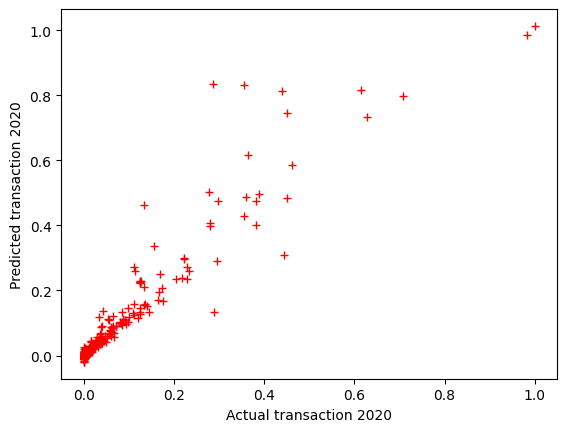

In [100]:
plt.plot(y_test,y_pred,'r+')
plt.xlabel('Actual transaction 2020')
plt.ylabel('Predicted transaction 2020')

---

در این مرحله داده‌های مربوط به سال 2020 را به مدل داده و خروجی برای سال 2021 را پیشبینی میکنیم.

In [101]:
y_pred_2021 = model.predict(data2020)

در شکل زیر رابطه بین مقادیر سال 2020 و مقادیر پیش بینی شده برای 2021 پلات شده است که یک رابطه خطی بین این دو را نشان میدهد. با توجه به اینکه ما مقادیر مربوط به سال 2021 را نداریم این پلات میتواند نشان دهنده عملکرد منطقی مدل پیشنهادی باشد.

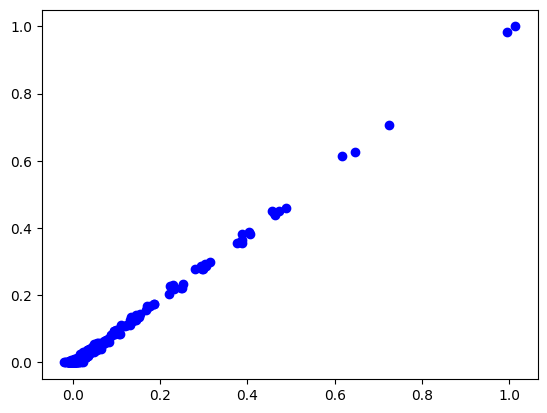

In [102]:
plt.plot(y_pred_2021,data2020['this year'],'bo')

#  بخش دوم (مسئله طبقه بندی)

.در این بخش ابتدا داده ها را می خوانیم سپس تعداد داد ه های موجود در هر کلاس را به صورت یک پلات نمایش می دهیم

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('./Classification_Train.xlsx')

In [104]:
X = df.drop('Class_Label', axis=1)
y=df['Class_Label']

Index([1, 3, 2, 5, 4], dtype='int64', name='Class_Label')
[1056  923  479  468  373]


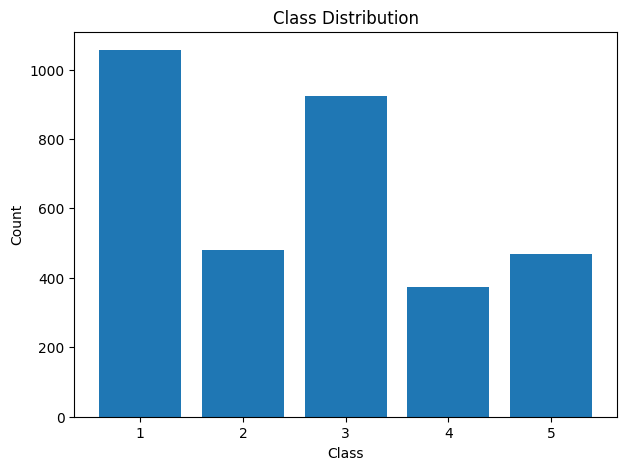

In [105]:
import matplotlib.pyplot as plt

class_counts = df['Class_Label'].value_counts()

# Extract the class labels and their corresponding counts
class_labels = class_counts.index
class_values = class_counts.values
print(class_labels)
print(class_values)
# Plot the class distribution
plt.figure(figsize=(7, 5))
plt.bar(class_labels, class_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

همانطور که مشاهده می نمایید تعداد داده ها در کلاس های 1 و 3 بیشتر از بقیه ی کلاس ها می باشد و در واقع توزیع داده های ما در کلاس ها بالانس نمی باشد. بالانس نبودن داده ها باعث می شود مدل بر روی کلاس هایی که تعداد بیشتری داده دارند اورفیت شود و هنگام تست بقیه ی کلاس ها را به خوبی پیش بینی نکند و خطای تست افزایش یابد. به همین جهت داده ها را بالانس می کنیم.دو روش برای این کار وجود دارد: حذف داده از کلاس هایی که داده های بیشتری دارند یا افزایش داده ی کلاس هایی که داده ی کمتری دارند. در این مساله ما از روش دوم جهت بالانس کردن استفاده نمودیم چون تعداد داده های آموزش زیاد نمی باشد.

Index([3, 4, 5, 2, 1], dtype='int64', name='Class_Label')
[1056 1056 1056 1056 1056]


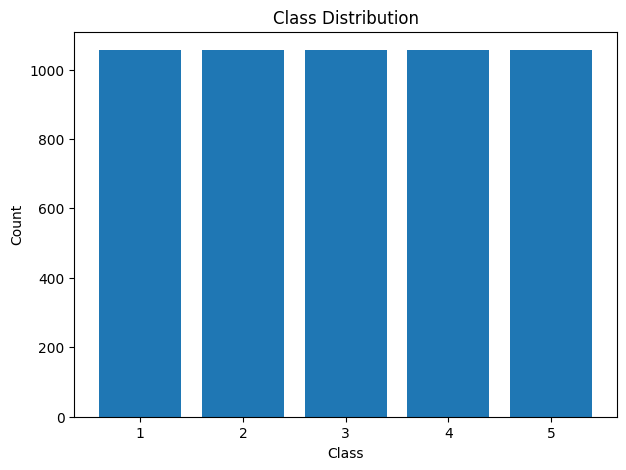

In [106]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

class_counts = y_balanced.value_counts()
class_labels = class_counts.index
class_values = class_counts.values
print(class_labels)
print(class_values)
plt.figure(figsize=(7, 5))
plt.bar(class_labels, class_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

با استفاده از الگوریتم پی سی ای بعد داده ها را کاهش می دهیم تا بتوانیم نمایش دیگری از داده ها در دو بعد داشته باشیم. همانطور که مشاهده می کنید به نظر می رسد مرز بین کلاس ها مشخص است وبه ظاهر از هم جدا می باشند به همین دلیل از یه مدل خطی برای طبقه بندی استفاده می نماییم.

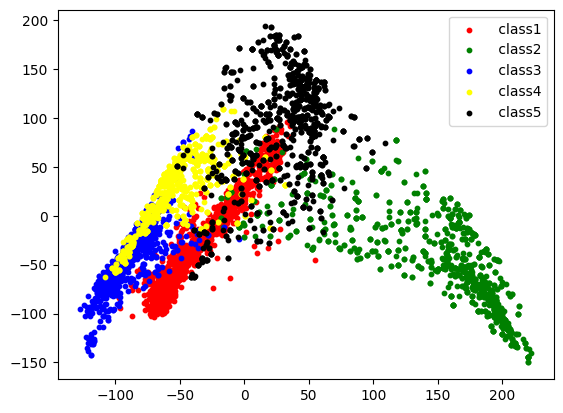

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_balanced)
# plot the results
colors = ['red', 'green','blue','yellow','black']
classes= ['class1','class2','class3','class4','class5']
for i in range(5):
    plt.scatter(reduced_data[y_balanced == i+1, 0],
                reduced_data[y_balanced == i+1, 1],
                s=10, c=colors[i],
                label=f' {classes[i]}')
plt.legend()
plt.show()

## Support Vector Machines (SVM):

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Data normalization
scaler = MinMaxScaler()
X_balanced = scaler.fit_transform(X_balanced)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

model = SVC(kernel='rbf')
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [109]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

correct_predictions = 0
incorrect_predictions = 0

# Counter for each class wrong predictions
class_errors = {class_label: 0 for class_label in set(y_test)}

# Iterate over y_test and y_pred
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1
        class_errors[true_label] += 1

print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Class Errors:")
for class_label, error_count in class_errors.items():
    print(f"Class {class_label}: {error_count} errors")

Accuracy: 0.9346590909090909
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       209
           2       0.99      0.98      0.98       215
           3       0.85      0.94      0.89       207
           4       0.93      0.83      0.87       211
           5       0.94      0.96      0.95       214

    accuracy                           0.93      1056
   macro avg       0.94      0.93      0.93      1056
weighted avg       0.94      0.93      0.93      1056

Correct Predictions: 987
Incorrect Predictions: 69
Class Errors:
Class 1: 7 errors
Class 2: 5 errors
Class 3: 12 errors
Class 4: 36 errors
Class 5: 9 errors


با توجه به اینکه دقت مدل مطلوب نمی باشد شاید بتوان این نتیجه گیری را بنماییم که داده ها به صورت خطی از یکدیگر جدا نمی شوند و رابطه ی بین آن ها پیچیده تر می باشد. در این موارد الگوریتم رندوم فارست مناسب تر می باشد.

## Random Forest with Cross Validation

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_excel('./Classification_Train.xlsx')
X = df.drop('Class_Label', axis=1)
y = df['Class_Label']
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)

model = RandomForestClassifier()
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)



In [115]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

correct_predictions = 0
incorrect_predictions = 0
class_errors = {class_label: 0 for class_label in set(y_test)}

for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1
        class_errors[true_label] += 1

print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)

print("Class Errors:")
for class_label, error_count in class_errors.items():
    print(f"Class {class_label}: {error_count} errors")

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Accuracy: 0.9801136363636364
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       209
           2       1.00      1.00      1.00       215
           3       0.98      0.96      0.97       207
           4       0.97      0.98      0.97       211
           5       0.97      1.00      0.98       214

    accuracy                           0.98      1056
   macro avg       0.98      0.98      0.98      1056
weighted avg       0.98      0.98      0.98      1056

Correct Predictions: 1035
Incorrect Predictions: 21
Class Errors:
Class 1: 7 errors
Class 2: 0 errors
Class 3: 8 errors
Class 4: 5 errors
Class 5: 1 errors
Cross-Validation Scores: [0.97278107 0.97514793 0.97869822 0.97278107 0.96563981]
Mean Cross-Validation Accuracy: 0.9730096188900417


همانطور که مشاهده می نمایید نتایج الگوریتم رندوم فارست بهتر از اس وی ام می باشد بنابراین تحلیل قبلی درست می باشد. داده های تست را جهت پیش بینی به الگوریتم می دهیم و نتیجه را ذخیره می نماییم.

In [117]:
#Test the model on the Classification_Test
df_test = pd.read_excel('./Classification_Test.xlsx')
y_test = model.predict(df_test)
print(y_test)

predictions_df = pd.DataFrame(y_test, columns=['Predicted_Label'])
# Save the predictions to an Excel file
predictions_df.to_excel('predictions.xlsx', index=False)

[3 3 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 3 3 4 4 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 3 3 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 4 3 3
 3 3 4 4 4 4 4 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 4 3 4 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 5 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 5 5 5 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 5 3 3 3 3 3
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 5 5 5 5 5 5 3 3 3 3 4 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 5 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 5 5 5 5 3 3 3 4 4 4 2
 2 2 2 2 3 3 3 3 5 5 5 5 5 5 5 5 5 5 3 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 3 3 3
 5 5 5 5 5 5 5 5 2 5 5 5 4 4 2 2 2 2 3 5 5 5 5 5 2 2 2 4 4 4 2 2 2 2 3 5 5
 5 5 5 5 2 2 2 4 4 4 4 4 2 2 2 2 2 2 5 5 5 5 5 5 5 5 2 2 4 4 4 4 3 3 3 2 2
 5 5 5 5 5 5 2 2 3 3 2 2 

# بخش سوم

کوئری سوال اول:

In [ ]:
SELECT c.ID AS Customer_ID, c.Name AS Customer _Name, MAX(p.Amount) AS Max_Amnt
FROM  customer c
INNER JOIN purchase p 
ON c.ID = p.Customer_ID
GROUP BY  c.ID , c.Name

کوئری سوال دوم:

In [ ]:
SELECT 
subquery.Customer_ID , MIN(diff) AS min_dif, MAX(diff) AS max_diff
FROM (SELECT p.Customer _ID ,
LEAD (p.Date) OVER (PARTITION BY Customer_ID ORDER BY p.Date) - p.Date AS diff
FROM purchase p
WHERE TO_CHAR(p.Date,'mm','nls_calender= persian')= '06'  --extract(month from p.date)=10
GROUP BY  p.Customer_ID,p.Date) subquery
GROUP BY subquery.Customer_ID

کوئری سوال سوم:

In [ ]:
SELECT  COUNT(*) AS Purchase_Count , SUM(Amount) AS Total_Amount
FROM  purchase
WHERE
   Amount >= 1 AND Amount <= 10000
    AND  TO_CHAR(p.Date, 'mm', 'nls_calender= persian')= '06'   --extract(month from p.date)=10
UNION ALL
SELECT  COUNT(*) AS Purchase_Count,SUM(Amount) AS Total_Amount
FROM purchase
WHERE
    Amount > 10000 AND Amount <= 100000
    AND TO_CHAR(p.Date, 'mm', 'nls_calender= persian')= '06' --extract(month from p.date)=10
UNION ALL
SELECT COUNT(*) AS Purchase_Count, SUM(Amount) AS Total_Amount
FROM purchase
WHERE
    Amount > 100000
    AND TO_CHAR(p.Date, 'mm', 'nls_calender= persian')= '06'  --extract(month from p.date)=10